<a href="https://colab.research.google.com/github/katrinag2004/ds3001assignments/blob/main/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 43 (delta 5), reused 4 (delta 4), pack-reused 35 (from 2)
Receiving objects: 100% (43/43), 4.12 MiB | 4.28 MiB/s, done.
Resolving deltas: 100% (8/8), done.


Q1.

**What makes a model "linear"? "Linear" in what?**
In a linear model, the target (response or dependent) variable is estimated using a set of predictor (feature) variables, usually including a constant (intercept or bias) term.

**How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)**

If both the intercept and all dummy variables are included, one predictor can be exactly replicated as a combination of the others. This results in perfect multicollinearity, making some coefficients undefined.

**Can linear regression be used for classification? Explain why, or why not.**
Linear regression can be used for classification, but it is generally not ideal.

**What are signs that your linear model is over-fitting?**

A test is overfitting if it shows high accuracy on training data but significantly lower accuracy on test data, indicating poor generalization.

**Clearly explain multi-colinearity using the two-stage least squares technique.**

Multicolinearity occurs when predictor variables are highly correlated, making it difficult to estimate their individual effects and leading to unstable coefficients. 2sls addresses this by replacing an endogenous predictor with an IV that is correlated with the predictor but not with the model's error term. In pt 1 the problematic predictor is regressed on the IV to obtain predicted values, and in pt 2, these predicted values are used in place of the original predictor in the main regression. This reduces multicollinearity and provides more reliable coefficient estimates.

**How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable and your features/control/response/independent variables into your analysis?**

Nonlinear relationships can be incorporated by adding polynomial terms, using log transformations, including interaction terms, applying spline regression, or employing gams that allow for smooth, nonlinear functions of the predictors. These methods help model more complex relationships between the target and independent variables.

**What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?**
The intercept represents the expected value of the target when all predictors are zero, the slope coefficient shows the expected change in the target for a one-unit increase in a predictor, and the dummy variable coefficient indicates the difference in the target between the dummy's category and the reference category.

Most expensive borough: Manhattan with average price $183.66


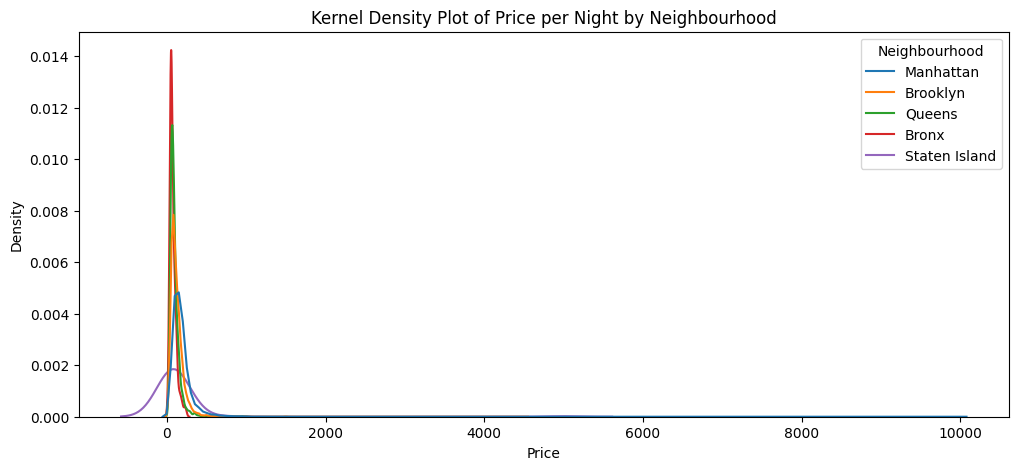

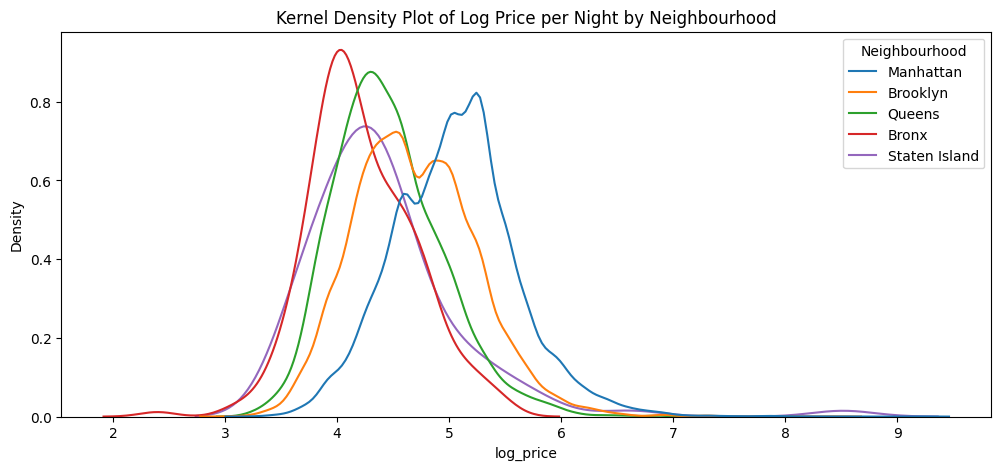

Regression Coefficients (No Intercept):
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64
Regression Coefficients (With Intercept):
Intercept: 75.27649769585331
Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64
R-squared: 0.0459
RMSE: 140.92
Coefficient on Review Scores Rating: 1.21
Most expensive property type: Condominium with average price $241.23


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/linearModels/data/Q1_clean.csv")

# Rename 'Neighbourhood ' to remove space
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# Compute average price and review score by Neighbourhood
avg_prices = df.groupby("Neighbourhood")["Price"].mean()
avg_scores = df.groupby("Neighbourhood")["Review Scores Rating"].mean()

# Find the most expensive borough
most_expensive = avg_prices.idxmax()
most_expensive_price = avg_prices.max()
print(f"Most expensive borough: {most_expensive} with average price ${most_expensive_price:.2f}")

# Kernel density plots
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x="Price", hue="Neighbourhood", common_norm=False)
plt.title("Kernel Density Plot of Price per Night by Neighbourhood")
plt.show()

plt.figure(figsize=(12, 5))
df["log_price"] = np.log(df["Price"] + 1)  # Avoid log(0)
sns.kdeplot(data=df, x="log_price", hue="Neighbourhood", common_norm=False)
plt.title("Kernel Density Plot of Log Price per Night by Neighbourhood")
plt.show()

# Regression without intercept
dummies = pd.get_dummies(df["Neighbourhood"], drop_first=False)  # Keep all dummies
X = dummies
y = df["Price"]
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)
print("Regression Coefficients (No Intercept):")
print(pd.Series(reg.coef_, index=X.columns))

# Regression with intercept
X = pd.get_dummies(df["Neighbourhood"], drop_first=True)  # Drop first category to avoid collinearity
reg_intercept = LinearRegression()
reg_intercept.fit(X, y)
print("Regression Coefficients (With Intercept):")
print(f"Intercept: {reg_intercept.intercept_}")
print(pd.Series(reg_intercept.coef_, index=X.columns))

# Train-test split for regression with Review Scores Rating and Neighbourhood
X = df[["Review Scores Rating"]].join(pd.get_dummies(df["Neighbourhood"], drop_first=True))
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_train = LinearRegression()
reg_train.fit(X_train, y_train)
y_pred = reg_train.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared: {reg_train.score(X_test, y_test):.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Coefficient on Review Scores Rating: {reg_train.coef_[0]:.2f}")

# Most expensive property type
avg_property_prices = df.groupby("Property Type")["Price"].mean()
most_expensive_property = avg_property_prices.idxmax()
most_expensive_property_price = avg_property_prices.max()
print(f"Most expensive property type: {most_expensive_property} with average price ${most_expensive_property_price:.2f}")


Most expensive borough: Manhattan with average price $183.66

Most expensive property type: Condominium with average price $241.23

count    9.660000e+02
mean     7.268965e+05
std      3.406196e+05
min      1.880000e+05
25%      4.727500e+05
50%      6.625000e+05
75%      8.747500e+05
max      1.978000e+06
Name: Price, dtype: float64


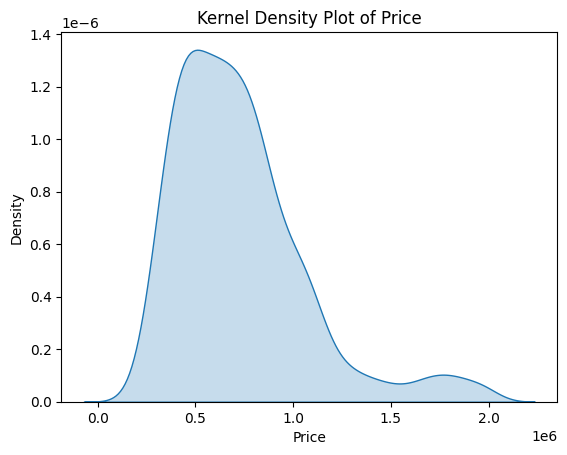

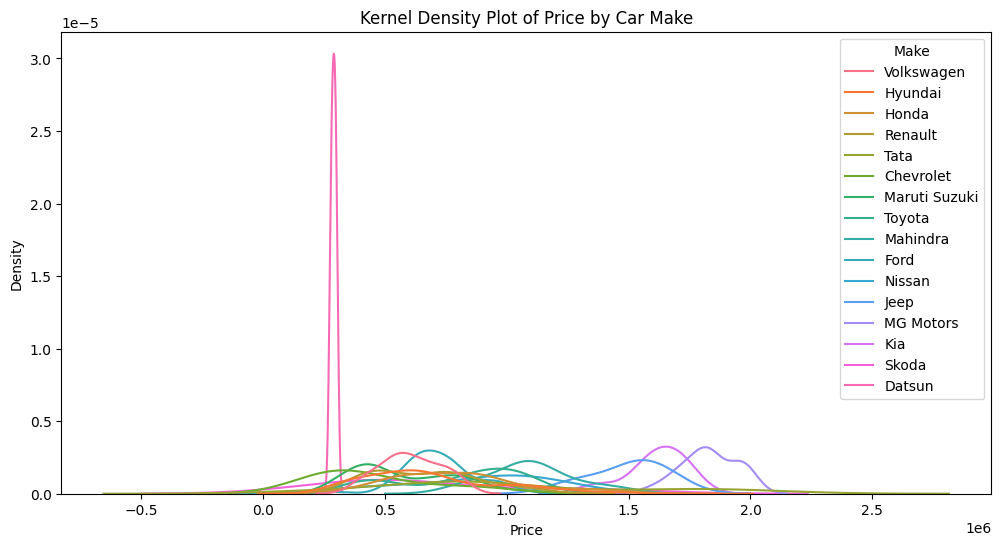

Model 1 - Numeric Variables: R^2: 0.2696, RMSE: 277081.02
Model 2 - Categorical Variables: R^2: 0.5258, RMSE: 223242.46
Model 3 - Combined: R^2: 0.7366, RMSE: 166376.38
Polynomial Regression: R^2: 0.2925, RMSE: 272690.47


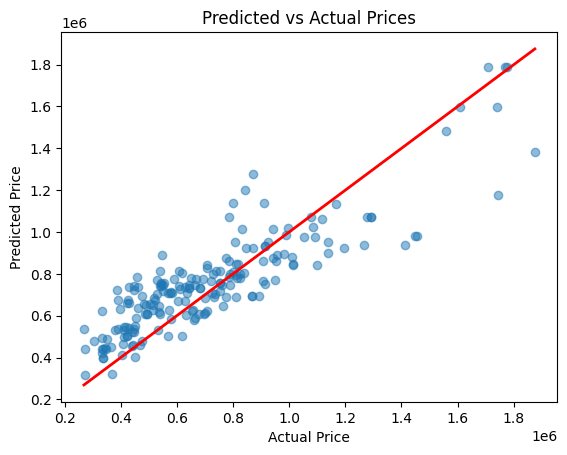

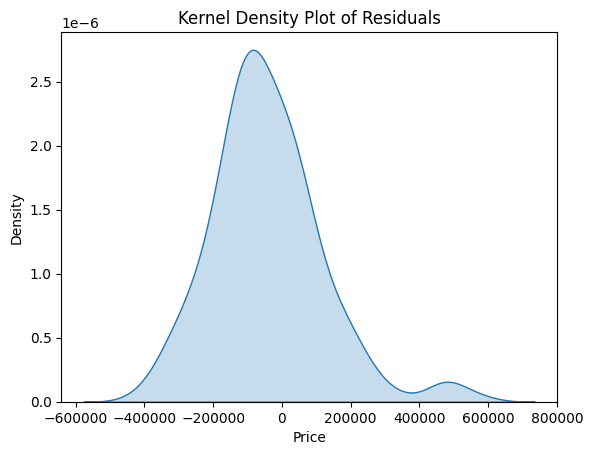

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/linearModels/data/cars_hw.csv")

# Handle outliers by capping Price at the 99th percentile
upper_limit = df['Price'].quantile(0.99)
df = df[df['Price'] <= upper_limit]

# Apply log transformation to positively skewed variables
df['log_Price'] = np.log(df['Price'] + 1)
df['log_Mileage_Run'] = np.log(df['Mileage_Run'] + 1)

# Summarize the Price variable
print(df['Price'].describe())

# Kernel density plot of Price
sns.kdeplot(df['Price'], fill=True)
plt.title("Kernel Density Plot of Price")
plt.show()

# Summarize prices by Make
df.groupby('Make')['Price'].describe()

# Grouped kernel density plot by Make
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Price', hue='Make', common_norm=False)
plt.title("Kernel Density Plot of Price by Car Make")
plt.show()

# Split data into train (80%) and test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Model 1: Regression with numeric variables
numeric_features = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
X_train_num = train_df[numeric_features]
X_test_num = test_df[numeric_features]
y_train = train_df['Price']
y_test = test_df['Price']

model_num = LinearRegression()
model_num.fit(X_train_num, y_train)
y_pred_num = model_num.predict(X_test_num)
rmse_num = np.sqrt(mean_squared_error(y_test, y_pred_num))
print(f"Model 1 - Numeric Variables: R^2: {model_num.score(X_test_num, y_test):.4f}, RMSE: {rmse_num:.2f}")

# Model 2: Regression with categorical variables (one-hot encoding)
X_train_cat = pd.get_dummies(train_df[['Make', 'Body_Type', 'Fuel_Type', 'Transmission_Type']], drop_first=True)
X_test_cat = pd.get_dummies(test_df[['Make', 'Body_Type', 'Fuel_Type', 'Transmission_Type']], drop_first=True)
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
y_pred_cat = model_cat.predict(X_test_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print(f"Model 2 - Categorical Variables: R^2: {model_cat.score(X_test_cat, y_test):.4f}, RMSE: {rmse_cat:.2f}")

# Model 3: Combined model
X_train_combined = train_df[numeric_features].join(X_train_cat)
X_test_combined = test_df[numeric_features].join(X_test_cat)

model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)
y_pred_combined = model_combined.predict(X_test_combined)
rmse_combined = np.sqrt(mean_squared_error(y_test, y_pred_combined))
print(f"Model 3 - Combined: R^2: {model_combined.score(X_test_combined, y_test):.4f}, RMSE: {rmse_combined:.2f}")

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_num)
X_test_poly = poly.transform(X_test_num)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression: R^2: {model_poly.score(X_test_poly, y_test):.4f}, RMSE: {rmse_poly:.2f}")

# Plot predicted vs actual
plt.scatter(y_test, y_pred_combined, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred_combined
sns.kdeplot(residuals, fill=True)
plt.title("Kernel Density Plot of Residuals")
plt.show()


MG motors and KIA are seen to be most expensive
prices generally look pretty spread out, but a lot of the brands have overlap.
Model 1 - Numeric Variables: R^2: 0.2696, RMSE: 277081.02
Model 2 - Categorical Variables: R^2: 0.5258, RMSE: 223242.46
Model 3 - Combined: R^2: 0.7366, RMSE: 166376.38
Polynomial Regression: R^2: 0.2925, RMSE: 272690.47
The points somewhat line up along the diagonal, but not perfectly.
The plot looks about bell shaped.